In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [56]:
df = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


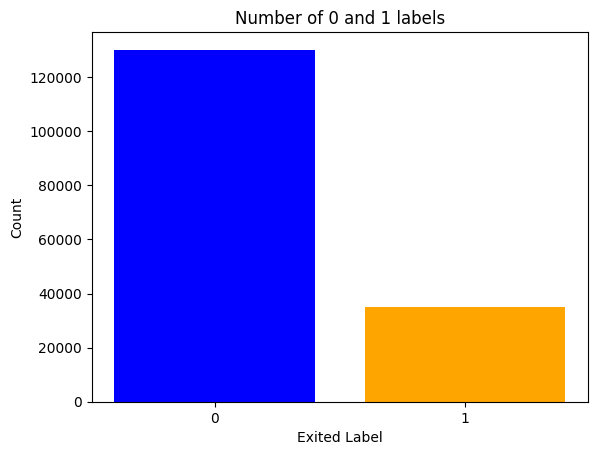

([<matplotlib.axis.XTick at 0x7c5d647b0e80>,
 [Text(0.0, 0, 'France'), Text(1.0, 0, 'Spain'), Text(2.0, 0, 'Germany')])

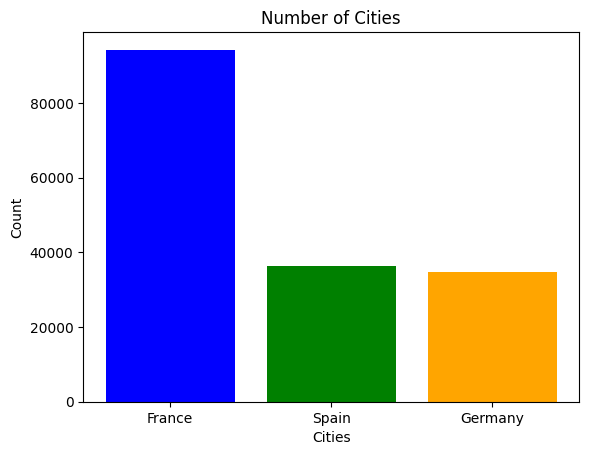

In [33]:
label_counts = df['Exited'].value_counts()
geography_count = df['Geography'].value_counts()

plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
plt.title('Number of 0 and 1 labels')
plt.xlabel('Exited Label')
plt.ylabel('Count')
plt.xticks(label_counts.index, ['0', '1'])
plt.show()

plt.bar(geography_count.index,geography_count.values,color=['blue','green','orange'])
plt.title('Number of Cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(geography_count.index,['France','Spain','Germany'])

In [34]:
geography_count = df['Geography'].value_counts()

geography_count

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [36]:
#converting to numbers

df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df['Age'] = df['Age'].astype(int)
df['Balance']=df['Balance'].astype(int)
df['EstimatedSalary']=df['EstimatedSalary'].astype(int)
df['IsActiveMember']=df['IsActiveMember'].astype(int)

df_new = df.drop(['id','CustomerId','Surname'],axis=1)
df_new

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33,3,0,2,1.0,0,181449,0
1,627,0,1,33,1,0,2,1.0,1,49503,0
2,678,0,1,40,10,0,2,1.0,0,184866,0
3,581,0,1,34,2,148882,1,1.0,1,84560,0
4,716,1,1,33,5,0,2,1.0,1,15068,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,1,0,33,2,0,1,1.0,1,131834,0
165030,792,0,1,35,3,0,1,0.0,0,131834,0
165031,565,0,1,31,5,0,1,1.0,1,127429,0
165032,554,1,0,30,7,161533,1,0.0,1,71173,0


In [39]:
X = df_new.drop(['Exited'],axis=1)
y = df['Exited']

In [40]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
X_scaled

array([[0.636     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.90727619],
       [0.554     , 0.        , 1.        , ..., 1.        , 1.        ,
        0.24748351],
       [0.656     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.92436281],
       ...,
       [0.43      , 0.        , 1.        , ..., 1.        , 1.        ,
        0.63715053],
       [0.408     , 0.5       , 0.        , ..., 0.        , 1.        ,
        0.35584381],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.30787925]])

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [50]:
rf_model = RandomForestClassifier()

In [62]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
test_pred =  rf_model.predict(X_test)
train_pred = rf_model.predict(X_train)

In [64]:
train_accuracy = accuracy_score(y_train,train_pred)
test_accuracy = accuracy_score(y_test,test_pred)

In [65]:
print("Training accuracy",train_accuracy)
print("Testing accuracy",test_accuracy)

Training accuracy 0.9997197542926826
Testing accuracy 0.8593025721816584


In [71]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [72]:
df_test['Gender'] = df_test['Gender'].map({'Male':1,'Female':0})
df_test['Geography']=df_test['Geography'].map({'France':0,'Spain':1,'Germany':2})
df_test['Age'] = df_test['Age'].astype(int)
df_test['Balance']=df_test['Balance'].astype(int)
df_test['EstimatedSalary']=df_test['EstimatedSalary'].astype(int)
df_test['IsActiveMember']=df_test['IsActiveMember'].astype(int)

In [74]:
df_test.head()



,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,0,0,23,2,0,2,0.0,1,160976
1,165035,15782418,Nott,683,0,0,46,2,0,1,1.0,0,72549
2,165036,15807120,K?,656,0,0,34,7,0,2,1.0,0,138882
3,165037,15808905,O'Donnell,681,0,1,36,8,0,1,1.0,0,113931
4,165038,15607314,Higgins,752,2,1,38,10,121263,1,1.0,0,139431


In [78]:
X_test_submit = df_test.drop(['id','CustomerId','Surname'],axis=1)
X_test_submit.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,0,23,2,0,2,0.0,1,160976
1,683,0,0,46,2,0,1,1.0,0,72549
2,656,0,0,34,7,0,2,1.0,0,138882
3,681,0,1,36,8,0,1,1.0,0,113931
4,752,2,1,38,10,121263,1,1.0,0,139431


In [79]:
X_test_submit_scaled = scaler.fit_transform(X_test_submit)

In [80]:
pred_submit = rf_model.predict(X_test_submit_scaled)

In [88]:
df_test['Exited'] = pred_submit

In [89]:
result = df_test[['id','Exited']]
result.to_csv("submissions.csv",index = False)

result

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0
